In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('C:/Users/dbda/Desktop/statistics/day2/MS_Dhoni_ODI_record.csv')
print(df)

    score runs_scored balls_faced strike_rate fours sixes     opposition  \
0       0           0           1           0     0     0   v Bangladesh   
1      12          12          11      109.09     2     0   v Bangladesh   
2      7*           7           2         350     0     1   v Bangladesh   
3       3           3           7       42.85     0     0     v Pakistan   
4     148         148         123      120.32    15     4     v Pakistan   
..    ...         ...         ...         ...   ...   ...            ...   
345   56*          56          61        91.8     3     2  v West Indies   
346   42*          42          31      135.48     4     1      v England   
347    35          35          33      106.06     4     0   v Bangladesh   
348   DNB           -           -           -     -     -    v Sri Lanka   
349    50          50          72       69.44     1     1  v New Zealand   

            ground        date  odi_number  
0       Chattogram  23/12/2004  ODI # 2199

In [4]:
# Basic chechs
print(df.head())
print(df.tail())

  score runs_scored balls_faced strike_rate fours sixes    opposition  \
0     0           0           1           0     0     0  v Bangladesh   
1    12          12          11      109.09     2     0  v Bangladesh   
2    7*           7           2         350     0     1  v Bangladesh   
3     3           3           7       42.85     0     0    v Pakistan   
4   148         148         123      120.32    15     4    v Pakistan   

          ground        date  odi_number  
0     Chattogram  23/12/2004  ODI # 2199  
1          Dhaka  26/12/2004  ODI # 2201  
2          Dhaka  27/12/2004  ODI # 2202  
3          Kochi  02/04/2005  ODI # 2235  
4  Visakhapatnam  05/04/2005  ODI # 2236  
    score runs_scored balls_faced strike_rate fours sixes     opposition  \
345   56*          56          61        91.8     3     2  v West Indies   
346   42*          42          31      135.48     4     1      v England   
347    35          35          33      106.06     4     0   v Bangladesh   

In [5]:
#data cleaning - opposition name says 'v aus' etc,we can remove 'v'
#df['Opposition']=df['Opposition'].apply(lambda x:x[2:])
df['opposition']=df['opposition'].str.replace('v ','',regex=False)
print(df['opposition'])

0       Bangladesh
1       Bangladesh
2       Bangladesh
3         Pakistan
4         Pakistan
          ...     
345    West Indies
346        England
347     Bangladesh
348      Sri Lanka
349    New Zealand
Name: opposition, Length: 350, dtype: object


In [6]:
#add a 'feature' -'year' column using the match date column
#first convert data column into datetime format

df['date']=pd.to_datetime(df['date'],dayfirst=True)
df['year']=df['date'].dt.year.astype(int)
print(df['year'])

0      2004
1      2004
2      2004
3      2005
4      2005
       ... 
345    2019
346    2019
347    2019
348    2019
349    2019
Name: year, Length: 350, dtype: int32


In [7]:
#create a column to distinguish between out and not out
df['score']=df['score'].apply(str)
df['not_out']=np.where(df['score'].str.endswith('*'),1,0)
print(df['score'])
print(df['not_out'])

0        0
1       12
2       7*
3        3
4      148
      ... 
345    56*
346    42*
347     35
348    DNB
349     50
Name: score, Length: 350, dtype: object
0      0
1      0
2      1
3      0
4      0
      ..
345    1
346    1
347    0
348    0
349    0
Name: not_out, Length: 350, dtype: int32


In [8]:
#dropping the odi_number feature
df_cp=df.drop(columns='odi_number')
print(df_cp.head())

  score runs_scored balls_faced strike_rate fours sixes  opposition  \
0     0           0           1           0     0     0  Bangladesh   
1    12          12          11      109.09     2     0  Bangladesh   
2    7*           7           2         350     0     1  Bangladesh   
3     3           3           7       42.85     0     0    Pakistan   
4   148         148         123      120.32    15     4    Pakistan   

          ground       date  year  not_out  
0     Chattogram 2004-12-23  2004        0  
1          Dhaka 2004-12-26  2004        0  
2          Dhaka 2004-12-27  2004        1  
3          Kochi 2005-04-02  2005        0  
4  Visakhapatnam 2005-04-05  2005        0  


In [9]:
#dropping those innings where dhoni did not bat and storing in a new dataframe
#take all the columns , starting with runs_scored
df_new=df.loc[((df['score'] != 'DNB')&(df['score'] != 'TDNB')),'runs_scored':]
print(df_new.head())

  runs_scored balls_faced strike_rate fours sixes  opposition         ground  \
0           0           1           0     0     0  Bangladesh     Chattogram   
1          12          11      109.09     2     0  Bangladesh          Dhaka   
2           7           2         350     0     1  Bangladesh          Dhaka   
3           3           7       42.85     0     0    Pakistan          Kochi   
4         148         123      120.32    15     4    Pakistan  Visakhapatnam   

        date  odi_number  year  not_out  
0 2004-12-23  ODI # 2199  2004        0  
1 2004-12-26  ODI # 2201  2004        0  
2 2004-12-27  ODI # 2202  2004        1  
3 2005-04-02  ODI # 2235  2005        0  
4 2005-04-05  ODI # 2236  2005        0  


In [10]:
#fixing the data types of numeriact columns
df_new['runs_scored']=df_new['runs_scored'].astype(int)
df_new['balls_faced']=df_new['balls_faced'].astype(int)
df_new['strike_rate']=df_new['strike_rate'].astype(float)
df_new['fours']=df_new['fours'].astype(int)
df_new['sixes']=df_new['sixes'].astype(int)
print(df_new.dtypes)

runs_scored             int32
balls_faced             int32
strike_rate           float64
fours                   int32
sixes                   int32
opposition             object
ground                 object
date           datetime64[ns]
odi_number             object
year                    int32
not_out                 int32
dtype: object


In [11]:
#career stats 
first_match_date=df['date'].min()
last_match_date=df['date'].max()
print(first_match_date)
print(last_match_date)

2004-12-23 00:00:00
2019-07-09 00:00:00


In [12]:
#career stats
first_match_date=df['date'].dt.date.min().strftime('%B %d,%Y') #first match
last_match_date=df['date'].dt.date.max().strftime('%B %d,%Y') #last match
print(first_match_date)
print(last_match_date)

December 23,2004
July 09,2019


In [13]:
number_of_macthes=df.shape[0]    # number if matches played in career
print("Number of matches played :",number_of_macthes)
number_of_inns=df_new.shape[0]
print("Number of innings played :",number_of_inns)

Number of matches played : 350
Number of innings played : 297


In [14]:
not_outs=df_new['not_out'].sum()
print("Number of not outs :",not_outs)

Number of not outs : 84


In [15]:
runs_scored=df_new['runs_scored'].sum()
print("Runs scored in career :",runs_scored)

Runs scored in career : 10773


In [16]:
balls_faced=df_new['balls_faced'].sum()
print("Balls faced in career :",balls_faced)

Balls faced in career : 12303


In [17]:
career_sr=(runs_scored/balls_faced)*100
print("Career strike rate :{:.2f}.format(career_sr)",career_sr)

Career strike rate :{:.2f}.format(career_sr) 87.56400877834675


In [18]:
career_avg=(runs_scored/(number_of_inns-not_outs))
print("Career average : {:.2f}.format(career_avg))",career_avg)

Career average : {:.2f}.format(career_avg)) 50.57746478873239


In [19]:
hundreds=(df_new['runs_scored'] >= 100).sum()
print("Number of hundreds :",hundreds)

Number of hundreds : 10


In [20]:
fifties=((df_new['runs_scored'] >= 50) & (df_new['runs_scored'] < 100)).sum()
print("Number of fifties :",fifties)

Number of fifties : 73


In [21]:
fours=df_new['fours'].sum()
print("Number of fours :",fours)

Number of fours : 826


In [22]:
sixes=df_new['sixes'].sum()
print("Number of sixes :",sixes)

Number of sixes : 229


In [23]:
#number of matches played against diffrent oppositions
#count the occuerrance of each unique value in th 'opposition' columns
#opposition_counts will be a series with a labelled index as opposition
opposition_counts = df['opposition'].value_counts()
print(opposition_counts)

opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


<Axes: title={'center': 'Number of matches against diffrent oppositions'}, xlabel='opposition'>

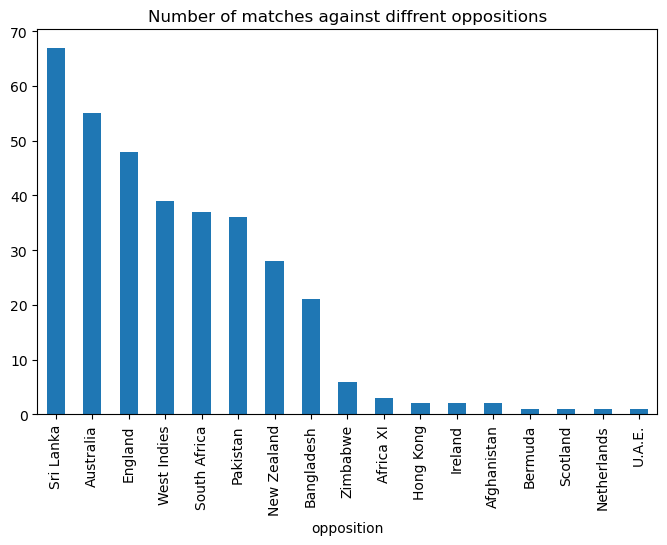

In [24]:
#plot the counts as a bar plot 
opposition_counts.plot(kind='bar',title='Number of matches against diffrent oppositions',figsize=(8,5))

In [26]:
#runs scored against each team
#group the dataframe by 'opposition' column
grouped_by_opposition=df_new.groupby('opposition')

In [27]:
#sum the 'runs_scored' columns for each group 
sum_of_runs_scored=grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int32


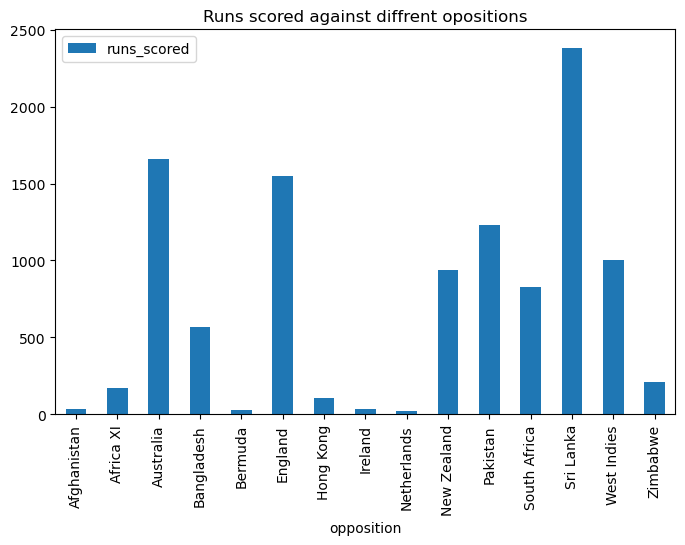

In [37]:
# sum_of_runs_scored is a series with a labelled index, which is opposition 
# convert it into a Dataframe and remove the index 
runs_scored_by_opposition=pd.DataFrame(sum_of_runs_scored).reset_index()
runs_scored_by_opposition.plot(x='opposition',kind='bar',title='Runs scored against diffrent opositions',figsize=(8,5))
#plt.xlable(None)
plt.show()


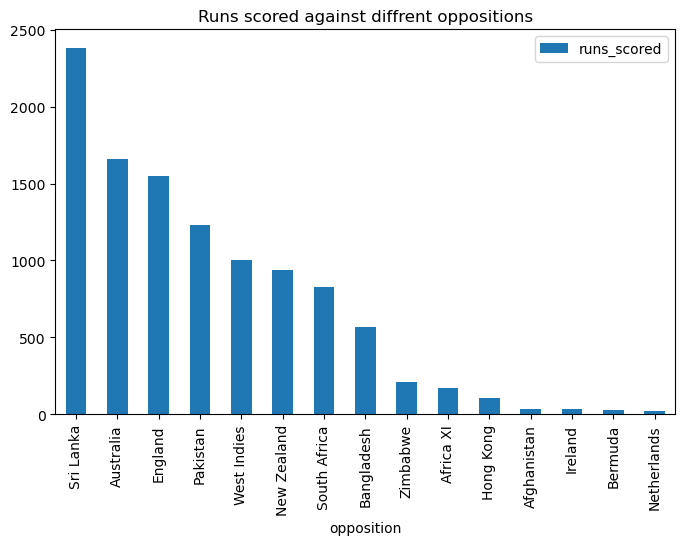

In [39]:
#Does not look good ... let us sort it ....
sorted=runs_scored_by_opposition.sort_values(by='runs_scored',ascending=False)
sorted.plot(x='opposition' , kind='bar',title='Runs scored against diffrent oppositions',figsize=(8,5))
plt.show()

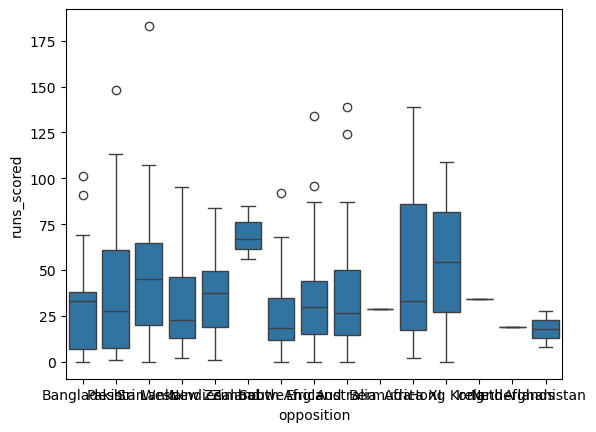

In [42]:
#Boxplot of runs against various oppositions
sns.boxplot(x='opposition',y='runs_scored',data=df_new)
plt.show()

In [43]:
#looks crwed -let us retain only major countries
#list of oppositions to filter
opposition_list=['England','Australia','West Indies','South Africe','New Zealand','Pakistan','Sri Lanka','Bangladesh']

#filter rows where 'opposition' is in the list
df_filtered=df_new[df_new['opposition'].isin(opposition_list)]
df_filtered=df_filtered.sort_values(by='runs_scored',ascending=False)
sns.boxplot(x='opposition',y='runs_scored',data=df_filtered)
plt.xticks(rotation=45)
plt.show()

In [51]:
#histogram(distplot) with and without kde(Kernel Density Estimation)
sns.displot(data=df_filtered,x ='runs_scored',kde=False)
plt.show()


In [54]:
#We see that there is a right/positive skew, so there is a long tail to the right
#histogram with bins
sns.set(style = 'darkgrid')
sns.histplot(data=df_new,x='runs_scored',bins=15)
plt.show()



In [56]:
#KDE plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_new,x='runs_scored')
plt.show()


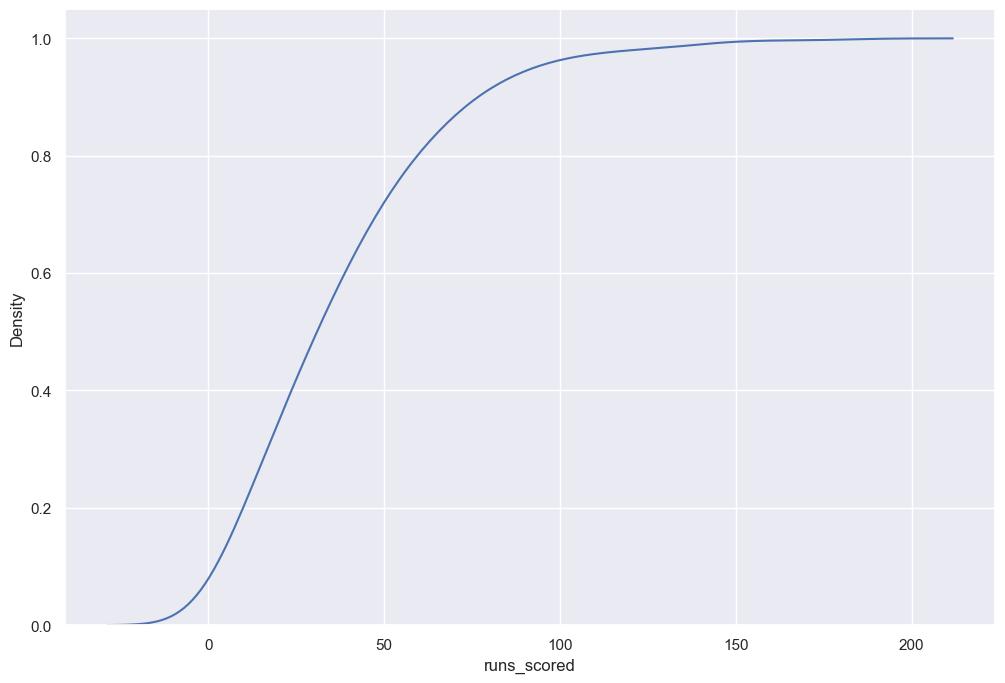

In [61]:
#KDE plot with cumulative probability
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_new,x='runs_scored',cumulative=True)
plt.show()

In [62]:
#joinplot
sns.jointplot(x='balls_faced',y='runs_scored',data=df_new,kind='scatter')
plt.show()

In [66]:
#heat map
#calculate the correlation matrix
correlation_matrix=df_new[['balls_faced','runs_scored']].corr()

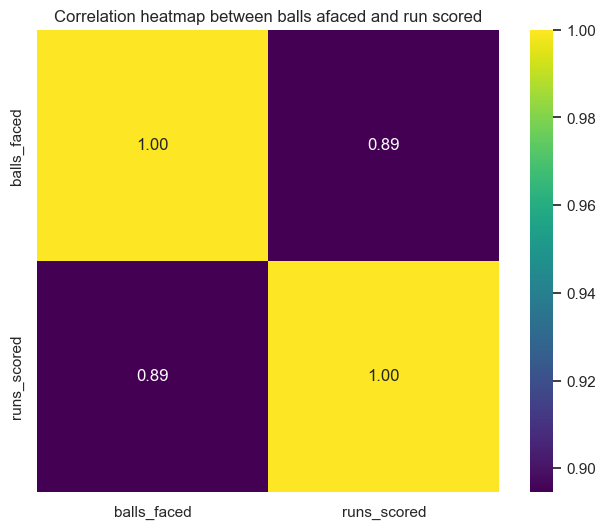

In [68]:
#create the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=correlation_matrix,annot=True,cmap='viridis',square=True,fmt=".2f")
plt.title('Correlation heatmap between balls afaced and run scored')
plt.show()

In [72]:
#calulat strike-rate per opposition and show as a heat map 
grouped_by_opposition=df_filtered.groupby('opposition')
agg_sum=grouped_by_opposition.agg({'balls_faced':'sum','runs_scored':'sum'})
df_strike_rate=agg_sum


In [74]:
#calculate strike rate
df_strike_rate['strike_rate'] = (df_strike_rate['runs_scored']/
                                 df_strike_rate['balls_faced'])*100
sns.heatmap(df_strike_rate,linewidth=0.5,annot=True,fmt='.0f',cmap='viridis')
plt.show()                            

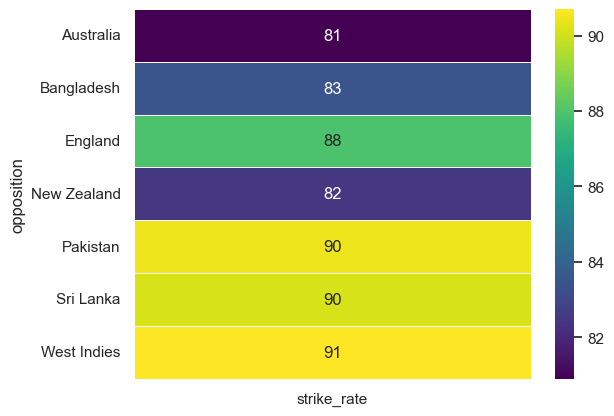

In [75]:
#bad graph-only retain strike rate column
df_strike_rate=df_strike_rate[['strike_rate']]
sns.heatmap(df_strike_rate,linewidth=0.5,annot=True,fmt='.0f',cmap='viridis')
plt.show()